# **data preprocessing and EDA**

In [1]:
import pandas as pd
data=pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv')
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [2]:
data.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [3]:
print(data.duplicated().sum())

272


In [4]:
data.shape

(1190, 12)

In [5]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


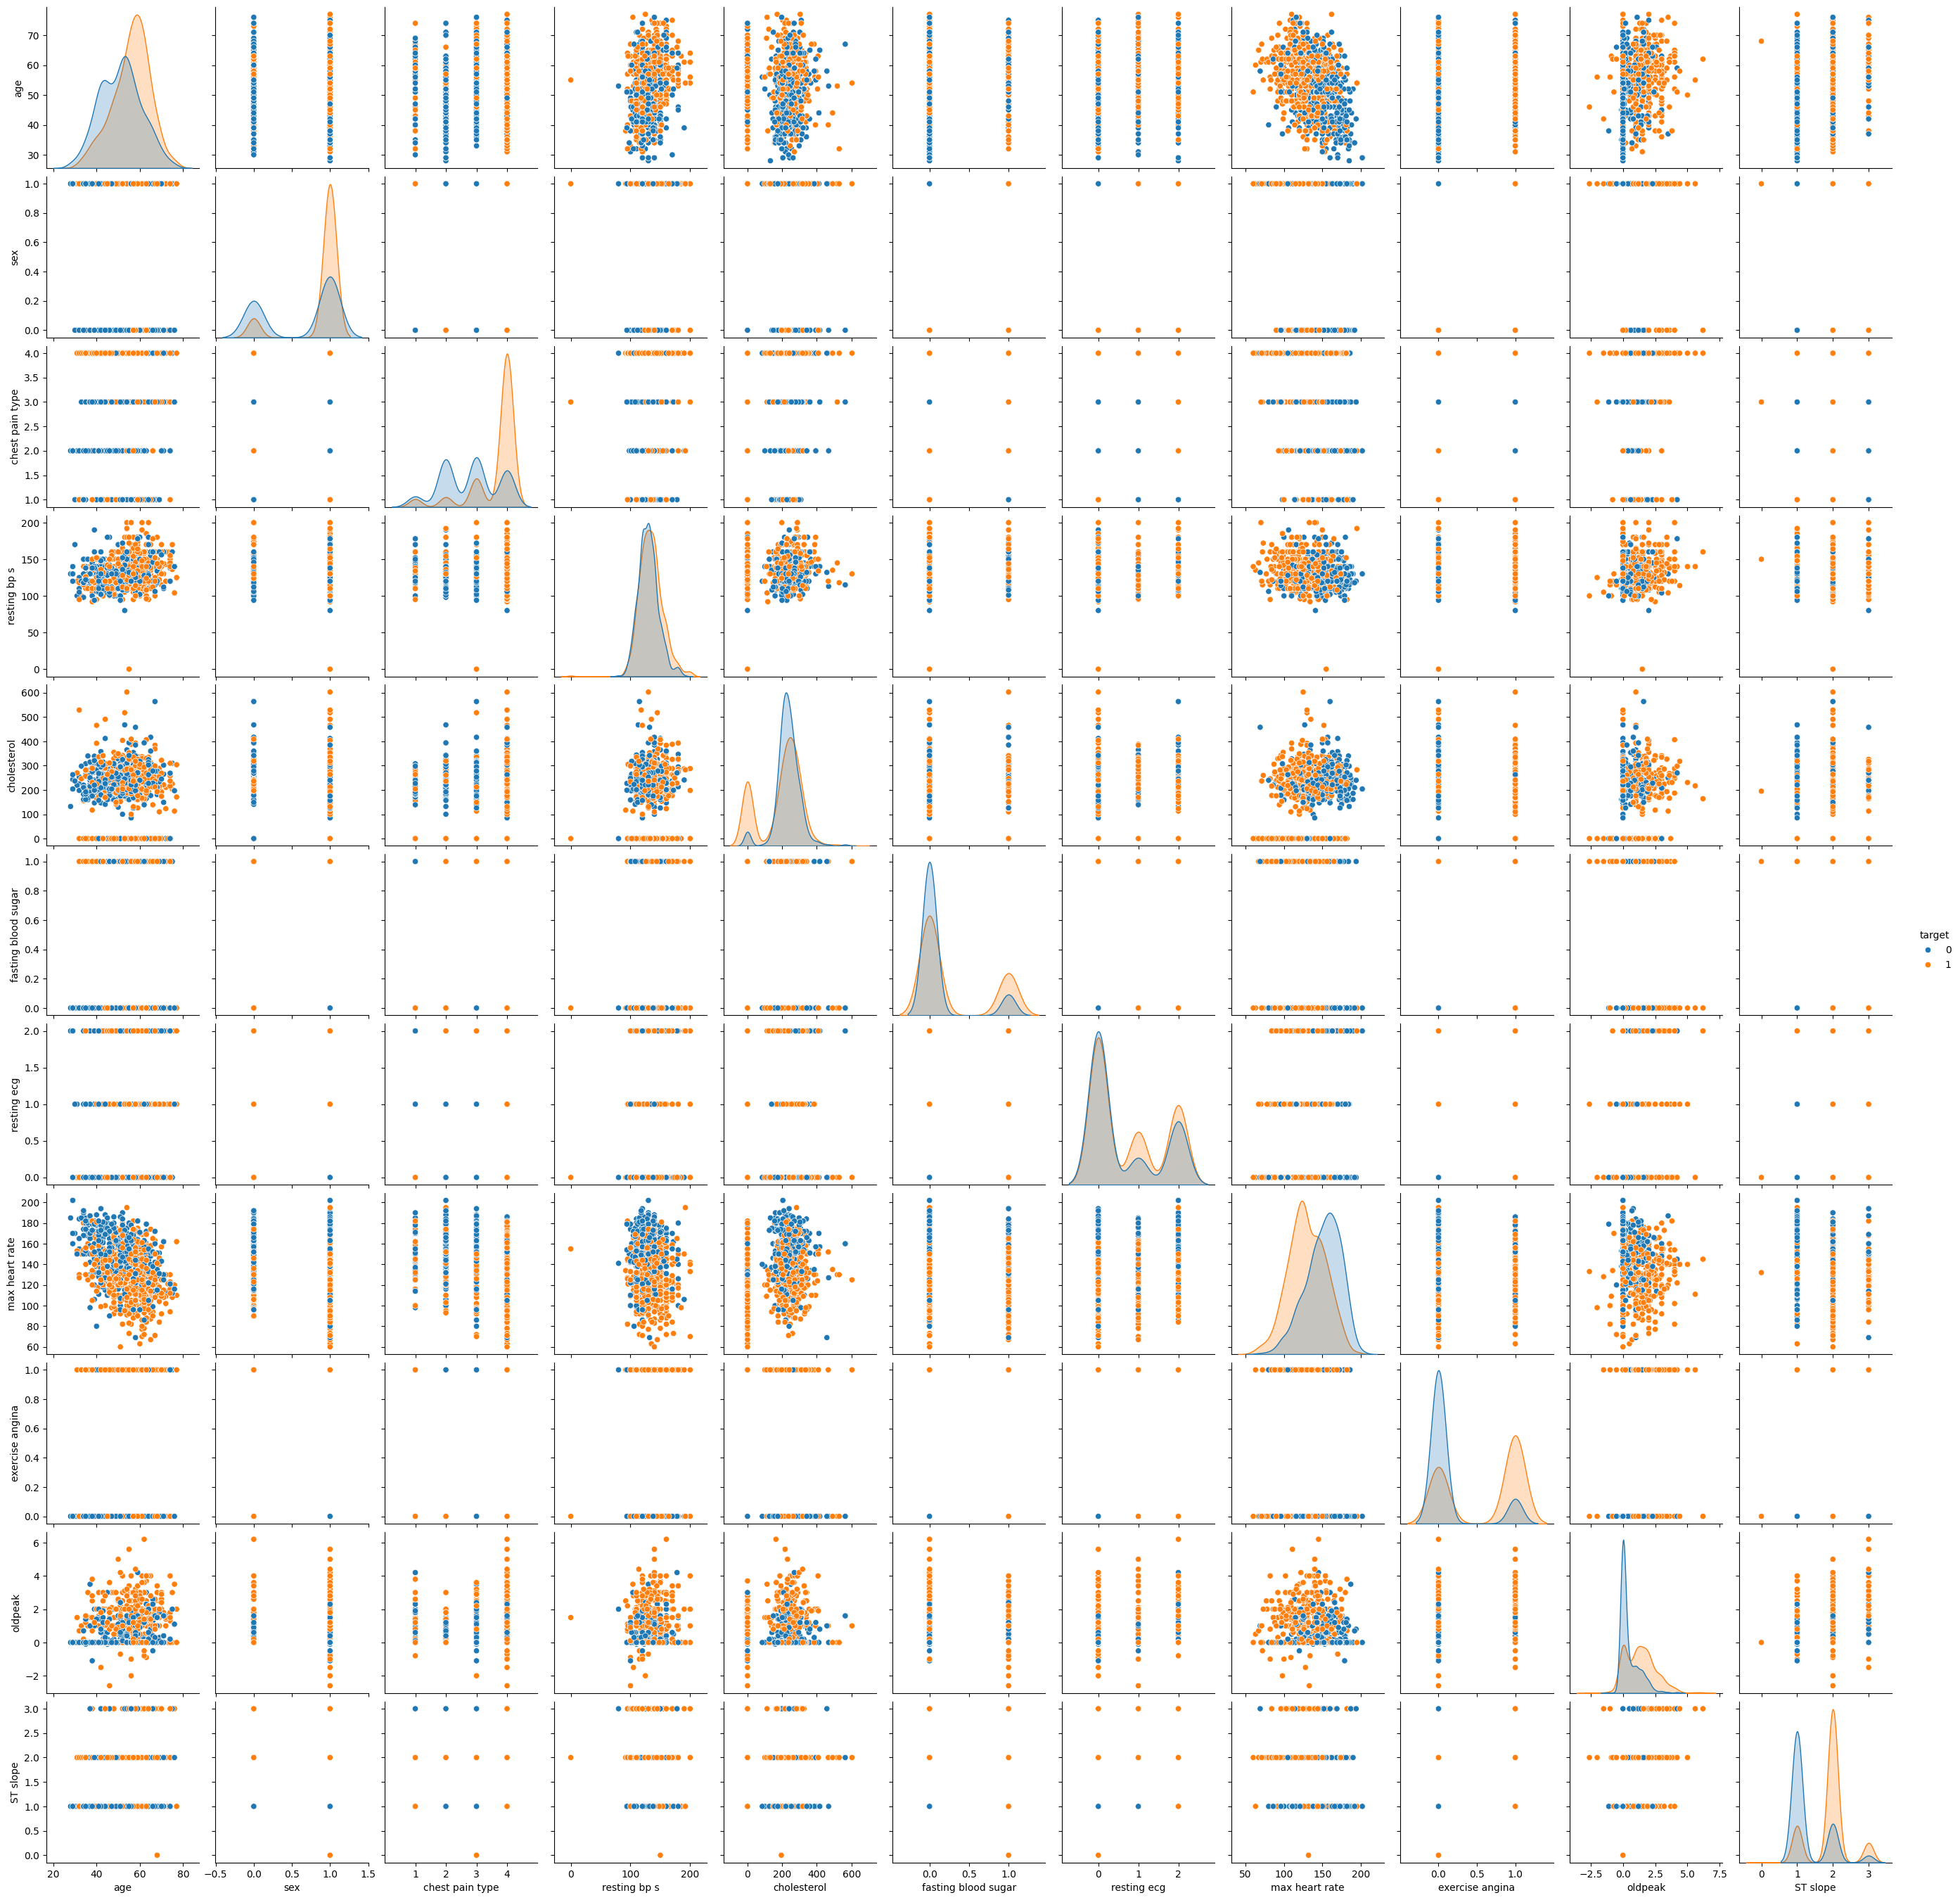

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data,hue='target')
plt.show()

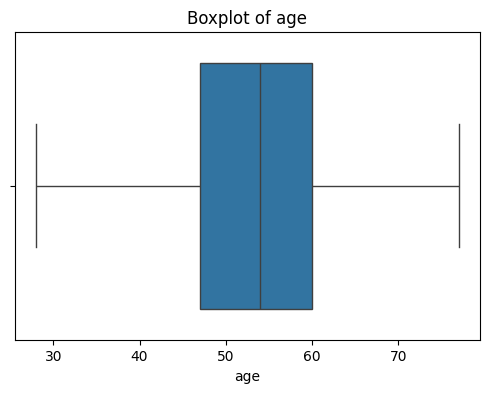

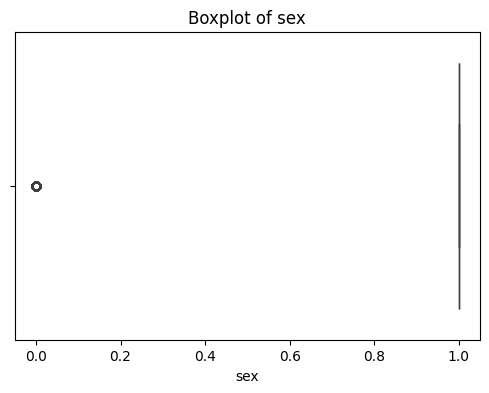

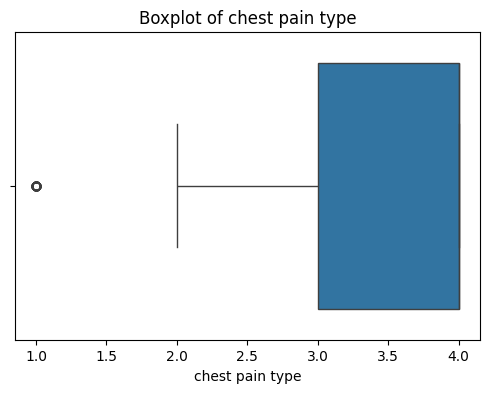

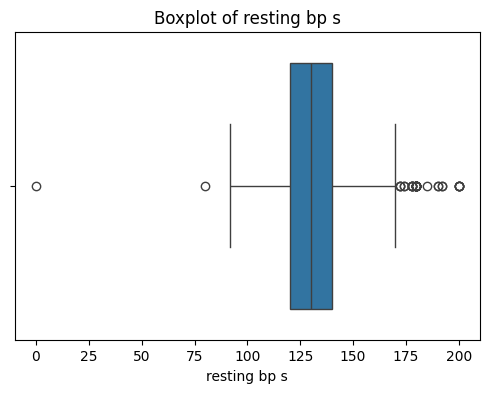

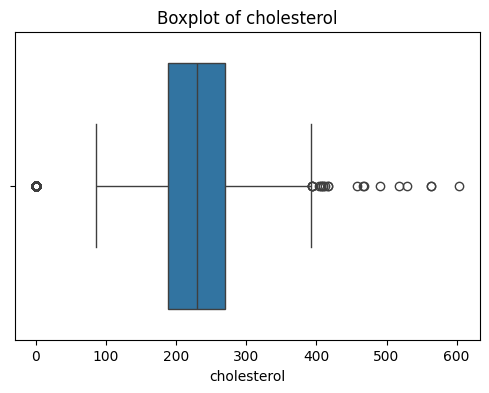

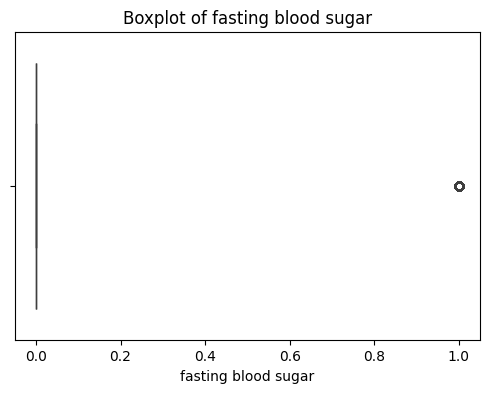

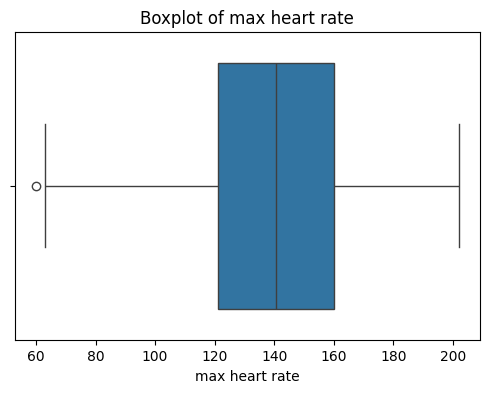

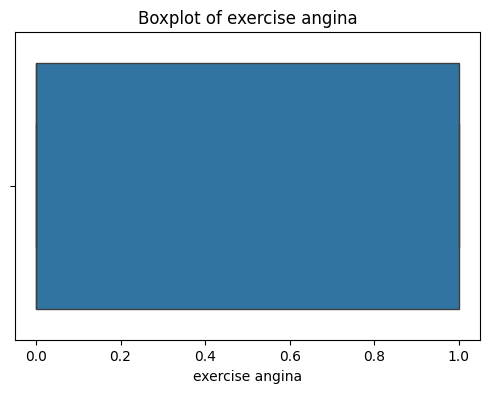

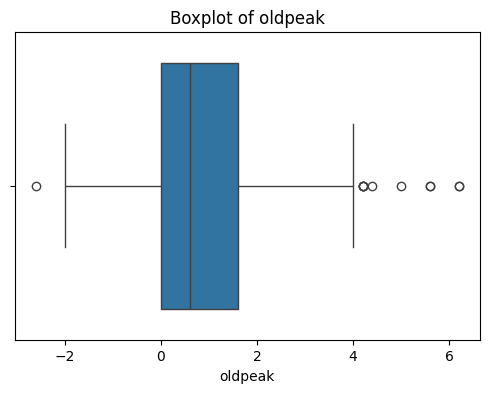

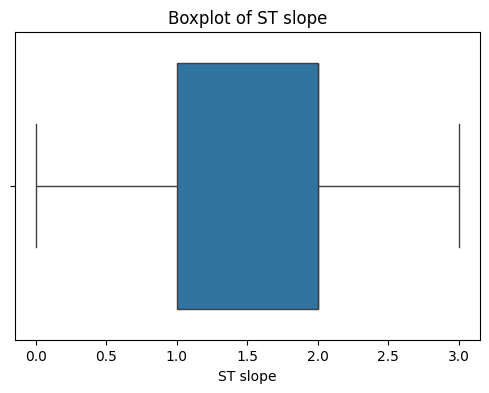

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

exclude_columns = ['target', 'excercise angina', 'resting ecg']
features = data.select_dtypes(include=['number']).columns
numerical_features = features.drop(exclude_columns, errors='ignore')

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [8]:
Q1 = data[numerical_features].quantile(0.25)
Q3 = data[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers=(data[numerical_features] < (Q1 - 1.5 * IQR)) | (data[numerical_features] > (Q3 + 1.5 * IQR))
print(outliers.sum())

age                      0
sex                    281
chest pain type         66
resting bp s            37
cholesterol            193
fasting blood sugar    254
max heart rate           1
exercise angina          0
oldpeak                 11
ST slope                 0
dtype: int64


In [9]:
data.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

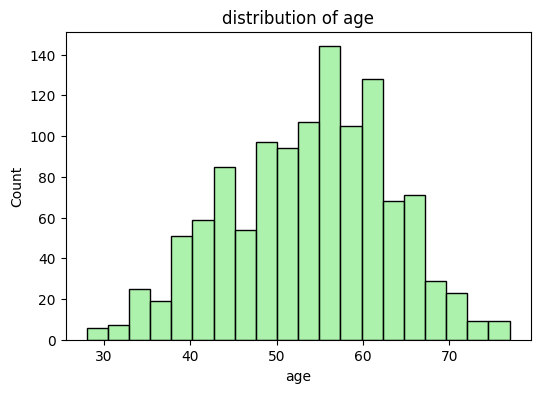

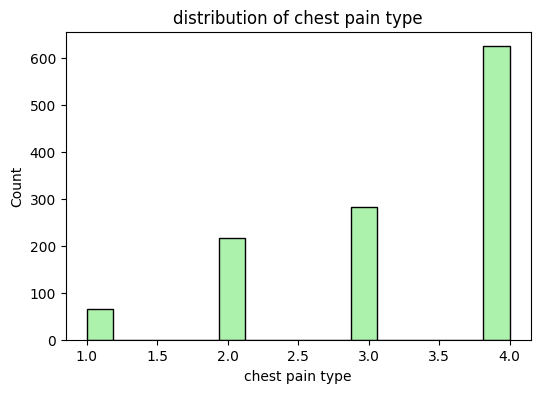

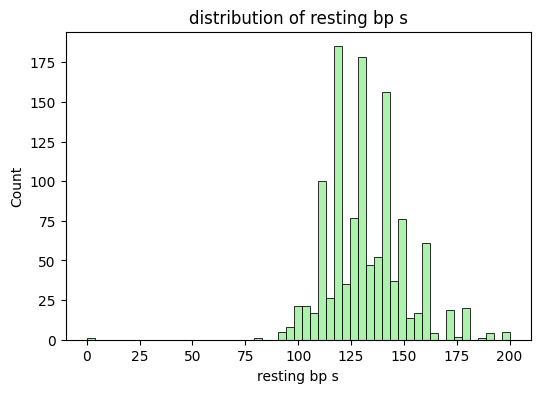

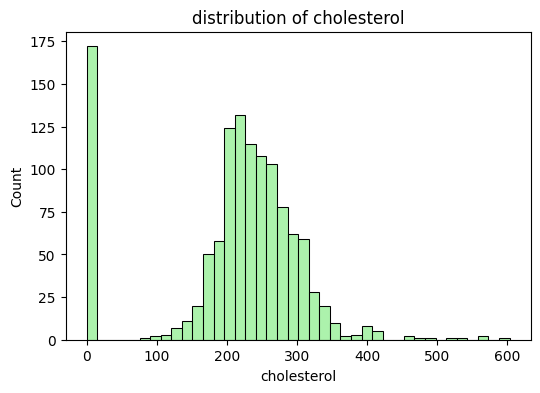

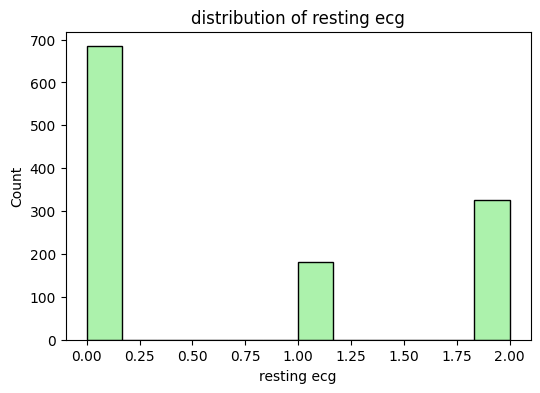

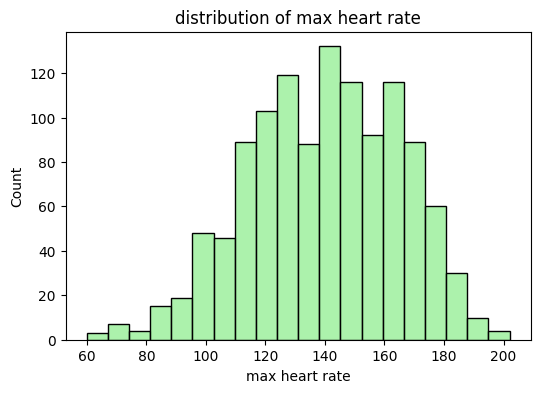

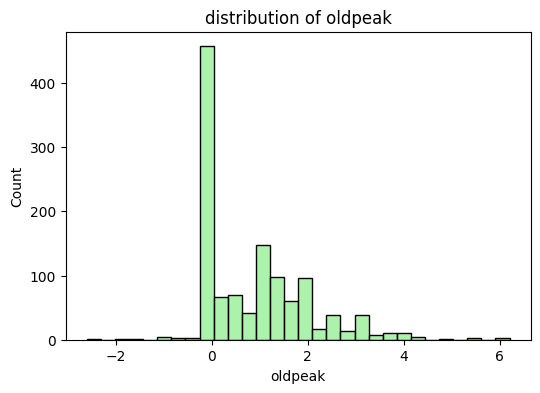

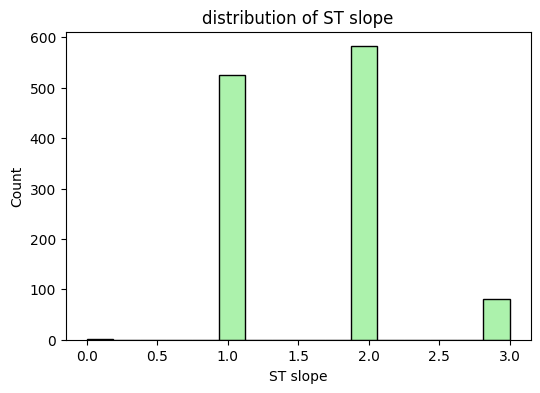

In [10]:
features=['age','chest pain type', 'resting bp s', 'cholesterol', 'resting ecg', 'max heart rate', 'oldpeak', 'ST slope']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(x=data[feature],color='lightgreen')
    plt.title(f'distribution of {feature}')
    plt.show()

In [11]:
data[features].head()

,age,chest pain type,resting bp s,cholesterol,resting ecg,max heart rate,oldpeak,ST slope
0,40,2,140,289,0,172,0.0,1
1,49,3,160,180,0,156,1.0,2
2,37,2,130,283,1,98,0.0,1
3,48,4,138,214,0,108,1.5,2
4,54,3,150,195,0,122,0.0,1


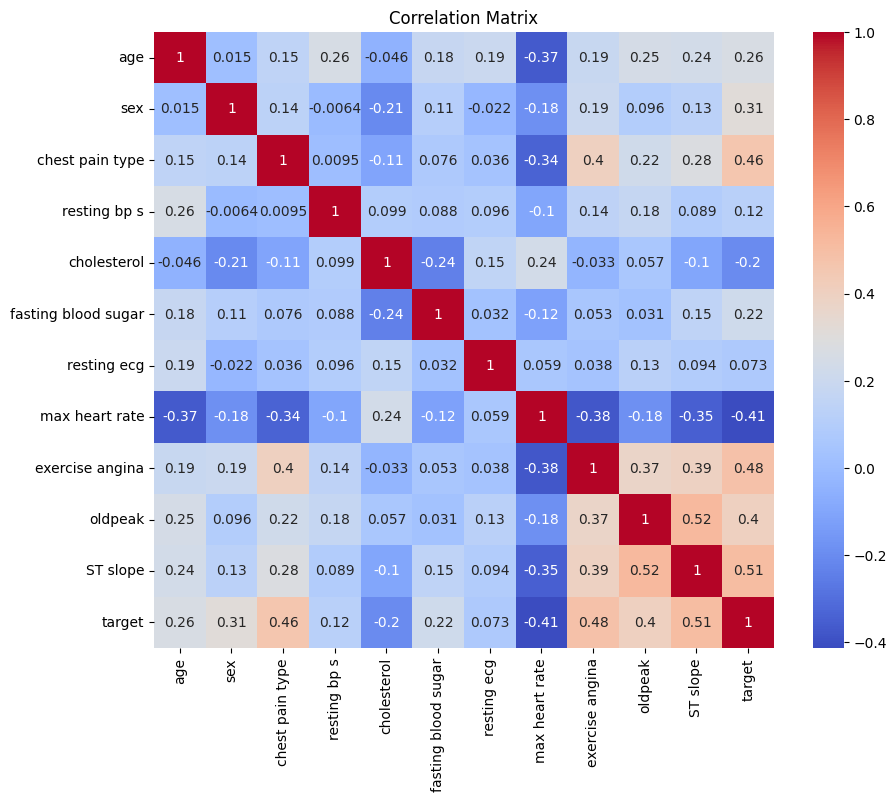

In [12]:
correlation_matrix=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,-1.466728,1,-1.318351,0.427328,0.775674,0,-0.802672,1.265039,0,-0.849792,-1.023217,0
1,-0.504600,0,-0.248932,1.516587,-0.299512,0,-0.802672,0.637758,0,0.071119,0.615583,1
2,-1.787437,1,-1.318351,-0.117301,0.716489,0,0.346762,-1.636136,0,-0.849792,-1.023217,0
3,-0.611503,0,0.820487,0.318402,0.035867,0,-0.802672,-1.244085,1,0.531575,0.615583,1
4,0.029915,1,-0.248932,0.971958,-0.151550,0,-0.802672,-0.695214,0,-0.849792,-1.023217,0


In [14]:
from sklearn.model_selection import train_test_split
X=data.drop('target',axis=1)
y=data['target']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# Standardize first
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# LASSO
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y)

# Get non-zero coefficient features
selected_features = X.columns[(lasso.coef_ != 0)]
print("Selected features by LASSO:", selected_features.tolist())

# Update datasets
X_selected = data[selected_features]
x_train_sel, x_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.2, random_state=42)


Selected features by LASSO: ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope']


# **MLP model**

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Train Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=42)
mlp.fit(x_train, y_train)
y_pred_mlp = mlp.predict(x_test)

# Evaluate
print("MLP Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_mlp):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_mlp):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_mlp):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))
print("Classification Report:")
print(classification_report(y_test, y_pred_mlp))

MLP Classifier Performance:
Accuracy: 0.92
Precision: 0.92
Recall: 0.94
F1-score: 0.93
Confusion Matrix:
[[ 96  11]
 [  8 123]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       107
           1       0.92      0.94      0.93       131

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238



# **LIME**

In [19]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=586fec9a46649e5bd6753e455d54f7bc35d20bfa5f3e704f33d141e3b0d44cc4
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


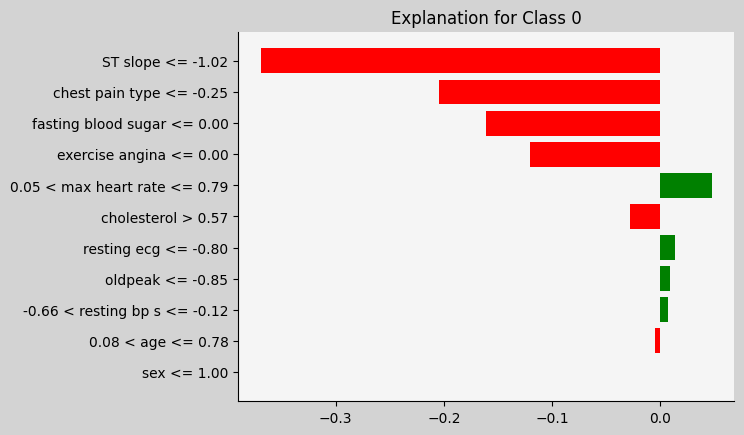

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


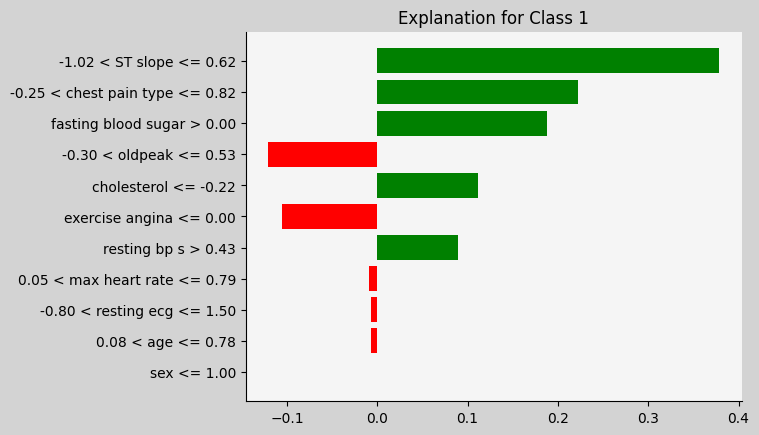

In [21]:
from lime.lime_tabular import LimeTabularExplainer

# Assuming 'selected_features' from feature selection are the top features
top_features = selected_features.tolist()  # Or define your desired top features

lime_explainer = LimeTabularExplainer(x_train_sel.values, feature_names=top_features)
classes = y.unique()

for class_label in classes:
    instance_index = y_test_sel[y_test_sel == class_label].index[0]
    instance = x_test_sel.loc[instance_index].values
    explanation = lime_explainer.explain_instance(instance, mlp.predict_proba, num_features=len(top_features))
    fig = explanation.as_pyplot_figure()
    fig.patch.set_facecolor('lightgray')
    ax = fig.gca()
    ax.set_facecolor('whitesmoke')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.title(f'Explanation for Class {class_label}')
    plt.show()

# **SHAP**

In [22]:
import shap

explainer = shap.Explainer(mlp.predict, x_train_sel)
shap_values = explainer(x_test_sel)

PermutationExplainer explainer: 239it [00:51,  4.59it/s]


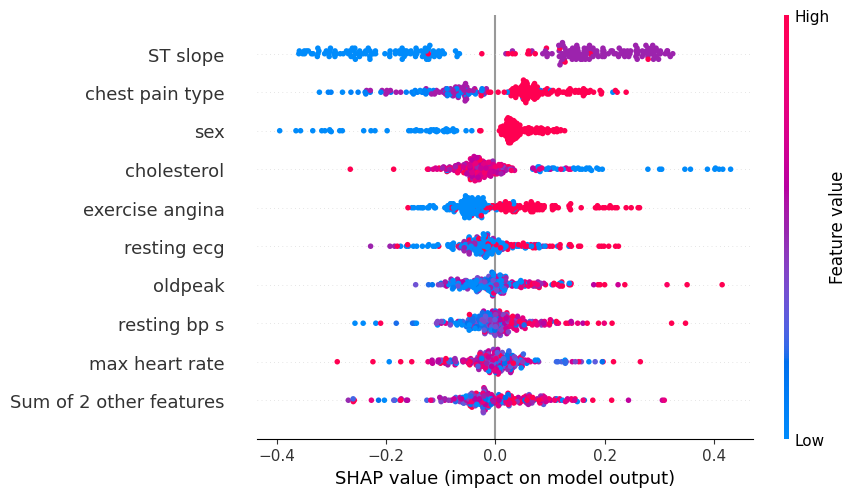

In [23]:
shap.plots.beeswarm(shap_values)

# SHAP Bar Plot (Feature importance)


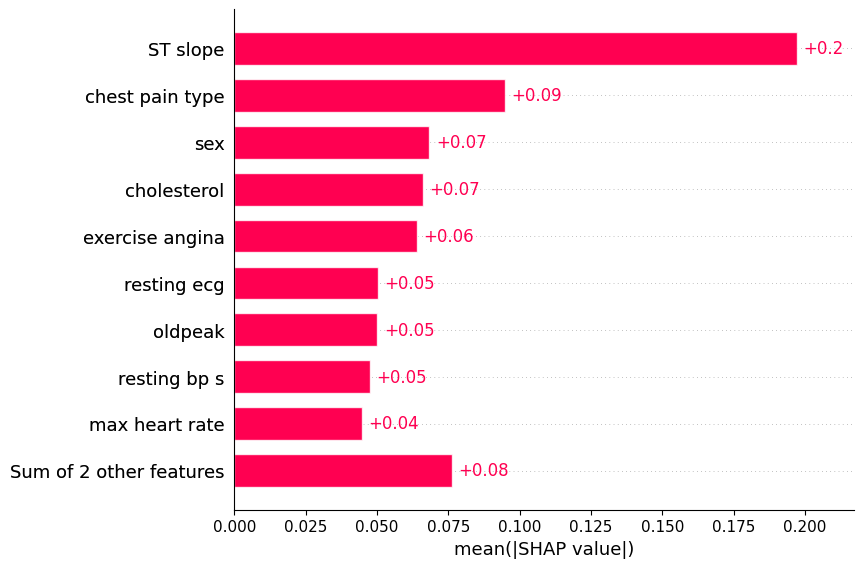

In [24]:
shap.plots.bar(shap_values)

#  SHAP Waterfall Plot (Local explanation)

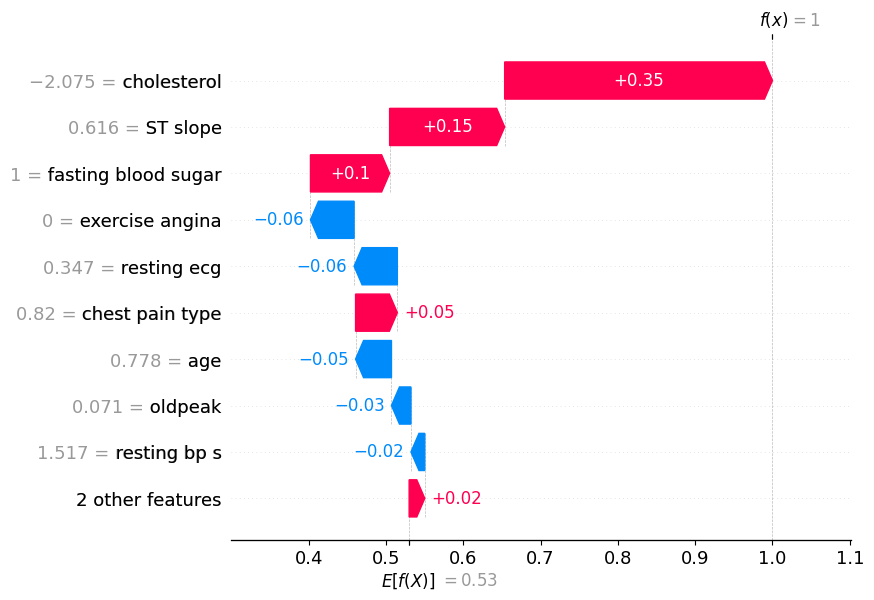

In [25]:
shap.plots.waterfall(shap_values[0])

# Pairwise Plot of Top Features

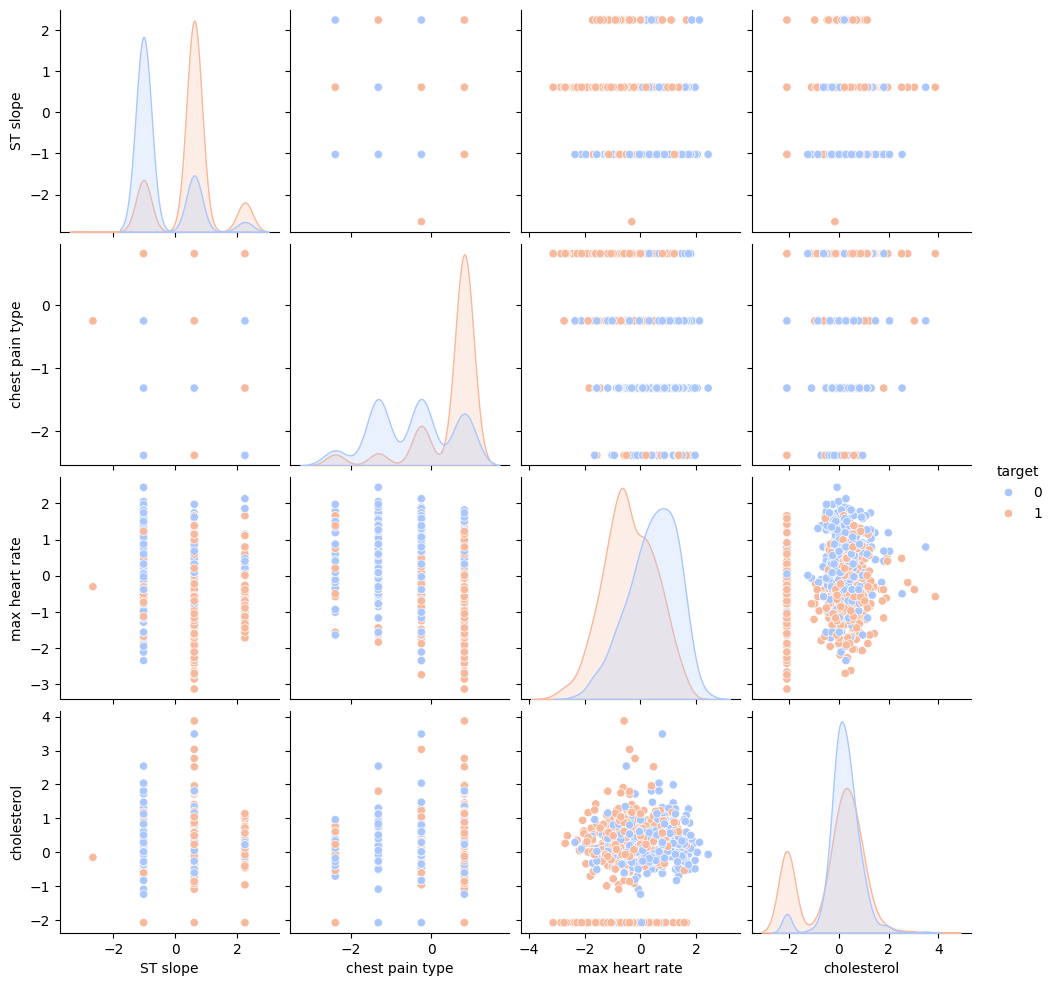

In [29]:
import seaborn as sns
from sklearn.inspection import permutation_importance

perm_importances = pd.Series(permutation_importance(mlp, x_train_sel, y_train_sel).importances_mean, index=x_train_sel.columns)
top_features = perm_importances.sort_values(ascending=False).head(4).index.tolist()
sns.pairplot(pd.concat([x_train_sel[top_features], y_train_sel], axis=1), hue='target', palette='coolwarm')
plt.show()


# PDP


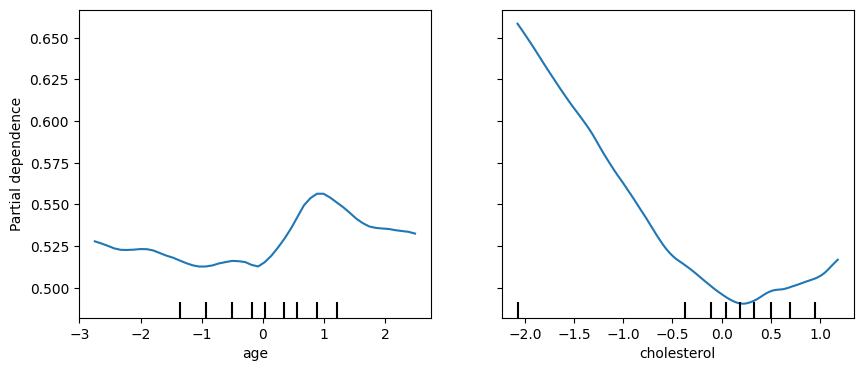

In [33]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

pdp_features = ['age', 'cholesterol']
fig, ax = plt.subplots(figsize=(10, 4))e
PartialDependenceDisplay.from_estimator(mlp, X, pdp_features, ax=ax)
plt.show()

# ICE

In [46]:
feature = [0]
target_class = 0

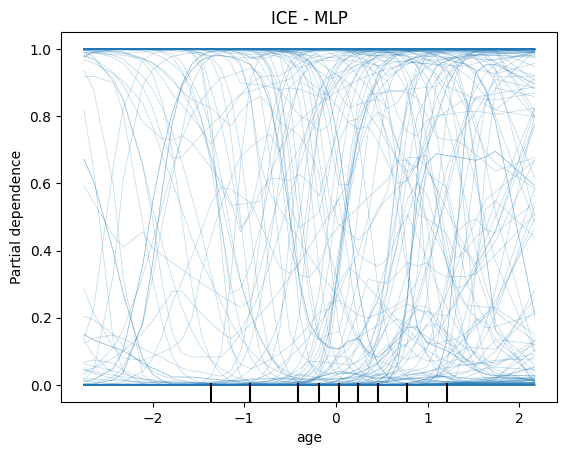

In [47]:
PartialDependenceDisplay.from_estimator(mlp, x_test, features=feature, target=target_class, kind='individual')
plt.title("ICE - MLP")
plt.show()